<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-&gt;-time-serie" data-toc-modified-id="->-time-serie-0.1">-&gt; time serie</a></span></li><li><span><a href="#outlier-detection" data-toc-modified-id="outlier-detection-0.2">outlier detection</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from statsmodels.graphics import tsaplots

%matplotlib inline

C:\Users\cleme\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sns.set(rc={"figure.figsize": (15, 6)})
sns.set_palette(sns.color_palette("Set2", 10))
sns.set_style("whitegrid")

In [3]:
CO2_measurement = pd.read_csv('data/CO2_sensor_measurements.csv', sep='\t')
CO2_measurement['timestamp'] = pd.to_datetime(CO2_measurement['timestamp'])
CO2_measurement.set_index(['LocationName', 'SensorUnit_ID', 'timestamp'], inplace=True);

## -> time serie

In [4]:
choosen_location = 'AJGR'
choosen_id = 1122

time_serie_dirty = CO2_measurement.loc[choosen_location].loc[choosen_id] 

## outlier detection 

In [9]:
time_serie = time_serie_dirty.copy()
time_serie[time_serie_dirty['CO2'] > 380] = np.nan
time_serie = time_serie.interpolate().resample('1H').mean()

time_serie_dif = time_serie.pct_change().dropna()

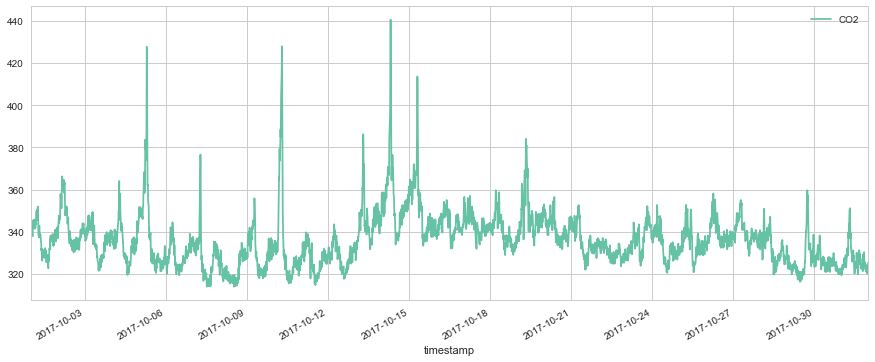

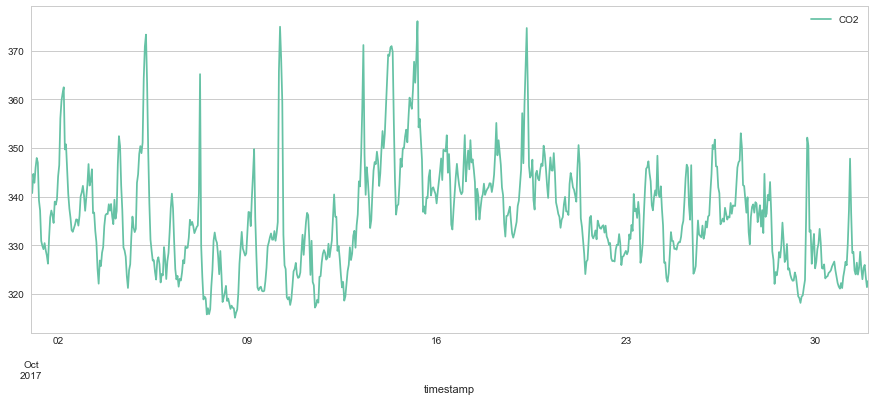

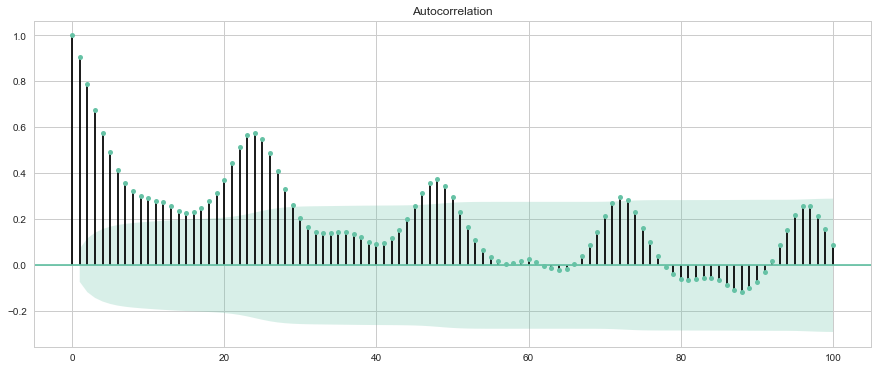

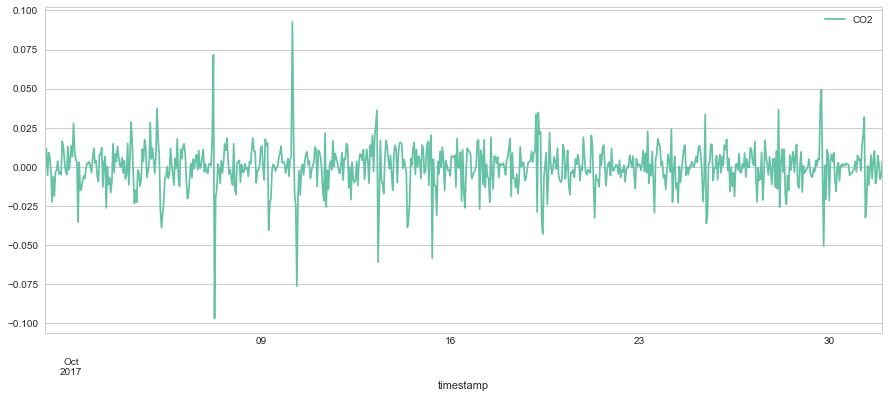

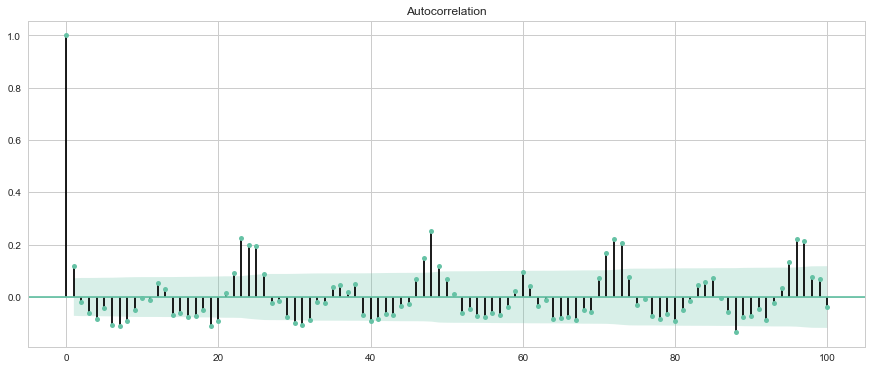

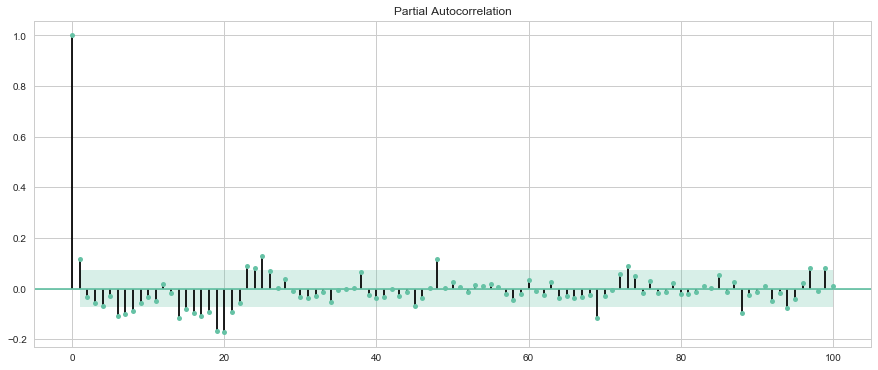

In [13]:
time_serie_dirty.plot()
plt.savefig('plots/raw_data.eps')

time_serie.plot()
plt.savefig('plots/raw_data_no_outliers.eps')

tsaplots.plot_acf(time_serie, lags=100)
plt.savefig('plots/raw_acf.eps')

time_serie_dif.plot()
plt.savefig('plots/dif_data.eps')

tsaplots.plot_acf(time_serie_dif, lags=100)
plt.savefig('plots/dif_acf.eps')

tsaplots.plot_pacf(time_serie_dif, lags=100)
plt.savefig('plots/dif_pacf.eps')

plt.show()